<!-- Notebook title -->
# Title

# 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

TODO

### 1.2 Useful Resources
<!--
- Links to relevant papers, articles, or documentation.
- Description of the datasets (if external).
-->

### 1.2.1 Data

#### 1.2.1.1 Common

* [Datasets Kaggle](https://www.kaggle.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A vast repository of datasets across various domains provided by Kaggle, a platform for data science competitions.
  
* [Toy datasets from Sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of small datasets that come with the Scikit-learn library, useful for quick prototyping and testing algorithms.
  
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)  
  &nbsp;&nbsp;&nbsp;&nbsp;A widely-used repository for machine learning datasets, with a variety of real-world datasets available for research and experimentation.
  
* [Google Dataset Search](https://datasetsearch.research.google.com/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A tool from Google that helps to find datasets stored across the web, with a focus on publicly available data.
  
* [AWS Public Datasets](https://registry.opendata.aws/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A registry of publicly available datasets that can be analyzed on the cloud using Amazon Web Services (AWS).
  
* [Microsoft Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of curated datasets from various domains, made available by Microsoft Azure for use in machine learning and analytics.
  
* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A GitHub repository that lists a wide variety of datasets across different domains, curated by the community.
  
* [Data.gov](https://www.data.gov/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A portal to the US government's open data, offering access to a wide range of datasets from various federal agencies.
  
* [Google BigQuery Public Datasets](https://cloud.google.com/bigquery/public-data)  
  &nbsp;&nbsp;&nbsp;&nbsp;Public datasets hosted by Google BigQuery, allowing for quick and powerful querying of large datasets in the cloud.
  
* [Papers with Code](https://paperswithcode.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A platform that links research papers with the corresponding code and datasets, helping researchers reproduce results and explore new data.
  
* [Zenodo](https://zenodo.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An open-access repository that allows researchers to share datasets, software, and other research outputs, often linked to academic publications.
  
* [The World Bank Open Data](https://data.worldbank.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A comprehensive source of global development data, with datasets covering various economic and social indicators.
  
* [OpenML](https://www.openml.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An online platform for sharing datasets, machine learning experiments, and results, fostering collaboration in the ML community.
  
* [Stanford Large Network Dataset Collection (SNAP)](https://snap.stanford.edu/data/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of large-scale network datasets from Stanford University, useful for network analysis and graph-based machine learning.
  
* [KDnuggets Datasets](https://www.kdnuggets.com/datasets/index.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A curated list of datasets for data mining and data science, compiled by the KDnuggets community.


#### 1.2.1.2 Project

### 1.2.2 Learning

* [K-Nearest Neighbors on Kaggle](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)

* [Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

### 1.2.3 Documentation

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [49]:
from ikt450.src.common_imports import *
from ikt450.src.config import get_paths
from ikt450.src.common_func import load_dataset, save_dataframe, ensure_dir_exists

import torch
import torchvision
import torchvision.transforms as transforms

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from PIL import Image
from torch.utils.data import Dataset, DataLoader

import skimage

In [50]:
paths = get_paths()

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

---

# 4. Data Processing

In [51]:
# Load the dataset Food11 from PATH_COMMON_DATASETS/food11
# the folder structure is PATH_COMMON_DATASETS/food11/training and PATH_COMMON_DATASETS/food11/evaluation and PATH_COMMON_DATASETS/food11/validation
#  and in these folders there are 11 subfolders with the class names
#  and in these subfolders there are the images
#  the dataset is loaded with the torchvision.datasets.ImageFolder function
#  and the images are transformed to tensors and normalized


mean = [0.485, 0.456, 0.406]  # ImageNet mean
std = [0.229, 0.224, 0.225]   # ImageNet std






train_transform = transforms.Compose([
     transforms.Resize(256),
    transforms.CenterCrop(224),        # Randomly crop the image to 224x224
 #   transforms.RandomHorizontalFlip(),        # Randomly flip the image horizontally
  #  transforms.RandomRotation(15),            # Randomly rotate the image by 15 degrees
    transforms.ColorJitter(                   # Randomly change brightness, contrast, saturation, and hue
        brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

test_transform = transforms.Compose([
    transforms.Resize(256),                   # Resize the shorter side to 256 pixels
    transforms.CenterCrop(224),               # Crop the center 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Resize((224, 224)),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [52]:
# read json file root=f"{paths['PATH_COMMON_DATASETS']}/balloon_dataset/balloon/train/via_region_data.json"

with open(f"{paths['PATH_COMMON_DATASETS']}/balloon_dataset/balloon/train/via_region_data.json") as f:
    data = json.load(f)
data


{'34020010494_e5cb88e1c4_k.jpg1115004': {'fileref': '',
  'size': 1115004,
  'filename': '34020010494_e5cb88e1c4_k.jpg',
  'base64_img_data': '',
  'file_attributes': {},
  'regions': {'0': {'shape_attributes': {'name': 'polygon',
     'all_points_x': [1020,
      1000,
      994,
      1003,
      1023,
      1050,
      1089,
      1134,
      1190,
      1265,
      1321,
      1361,
      1403,
      1428,
      1442,
      1445,
      1441,
      1427,
      1400,
      1361,
      1316,
      1269,
      1228,
      1198,
      1207,
      1210,
      1190,
      1177,
      1172,
      1174,
      1170,
      1153,
      1127,
      1104,
      1061,
      1032,
      1020],
     'all_points_y': [963,
      899,
      841,
      787,
      738,
      700,
      663,
      638,
      621,
      619,
      643,
      672,
      720,
      765,
      800,
      860,
      896,
      942,
      990,
      1035,
      1079,
      1112,
      1129,
      1134,
      1144,
      1153,


In [53]:

# get the image names and the corresponding list of coordinates from all_points_x and all_points_y for each region in the json file
image_names = list(data.keys())
image_names
coordinates = []
for image_name in image_names:
    regions = data[image_name]['regions']
    for region_index in regions:
        coordinates.append((image_name, regions[region_index]['shape_attributes']['all_points_x'], regions[region_index]['shape_attributes']['all_points_y']))
        

In [54]:
for i in coordinates:
    print(i)

('34020010494_e5cb88e1c4_k.jpg1115004', [1020, 1000, 994, 1003, 1023, 1050, 1089, 1134, 1190, 1265, 1321, 1361, 1403, 1428, 1442, 1445, 1441, 1427, 1400, 1361, 1316, 1269, 1228, 1198, 1207, 1210, 1190, 1177, 1172, 1174, 1170, 1153, 1127, 1104, 1061, 1032, 1020], [963, 899, 841, 787, 738, 700, 663, 638, 621, 619, 643, 672, 720, 765, 800, 860, 896, 942, 990, 1035, 1079, 1112, 1129, 1134, 1144, 1153, 1166, 1166, 1150, 1136, 1129, 1122, 1112, 1084, 1037, 989, 963])
('25899693952_7c8b8b9edc_k.jpg814535', [586, 510, 441, 389, 331, 268, 196, 158, 135, 156, 210, 307, 403, 437, 443, 425, 448, 481, 506, 513, 503, 511, 502, 583, 669, 755, 800, 811, 803, 784, 755, 717, 668, 620, 586], [133, 116, 115, 126, 149, 185, 261, 339, 438, 560, 664, 784, 868, 893, 929, 964, 964, 961, 965, 958, 936, 910, 896, 836, 752, 636, 538, 454, 392, 329, 270, 220, 175, 149, 133])
('24362039530_b151b41a52_k.jpg708540', [621, 641, 670, 694, 723, 747, 772, 810, 837, 863, 882, 893, 906, 918, 920, 917, 911, 900, 883, 859, 8

In [55]:
import os
import json
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2

class BalloonsDataset(Dataset):
    def __init__(self, json_file, img_dir, transforms=None):
        # Load the JSON annotations
        with open(json_file) as f:
            self.data = json.load(f)
        
        self.img_dir = img_dir
        self.transforms = transforms
        self.image_ids = list(self.data.keys())  # Get the image filenames from the JSON keys

    def __len__(self):
        return len(self.image_ids)
    
    def __getitem__(self, idx):
        # Get image filename
        img_id = self.image_ids[idx]
        img_info = self.data[img_id]
        img_filename = img_info['filename']
        
        # Load the image
        img_path = os.path.join(self.img_dir, img_filename)
        img = Image.open(img_path).convert("RGB")
        
        # Get the regions (objects in the image)
        regions = img_info['regions']
        
        # Initialize lists to store bounding boxes, masks, and labels
        boxes = []
        masks = []
        labels = []
        
        # Process each region (each object)
        for region in regions.values():
            shape_attributes = region['shape_attributes']
            all_points_x = shape_attributes['all_points_x']
            all_points_y = shape_attributes['all_points_y']
            
            # Create the polygon mask for the balloon
            mask = np.zeros((img.height, img.width), dtype=np.uint8)
            points = np.array([list(zip(all_points_x, all_points_y))], dtype=np.int32)
            cv2.fillPoly(mask, points, 1)  # Fill the polygon with 1s in the mask
            
            # Convert polygon to bounding box [x_min, y_min, x_max, y_max]
            x_min = min(all_points_x)
            y_min = min(all_points_y)
            x_max = max(all_points_x)
            y_max = max(all_points_y)
            
            # Add the bounding box, mask, and label (1 for balloon)
            boxes.append([x_min, y_min, x_max, y_max])
            masks.append(mask)
            labels.append(1)  # Only one class: balloon

        # Convert everything to tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        masks = torch.as_tensor(np.array(masks), dtype=torch.uint8)  # Efficient conversion to tensor
        labels = torch.as_tensor(labels, dtype=torch.int64)

        # Define the target dictionary as expected by Mask R-CNN
        target = {
            'boxes': boxes,
            'labels': labels,
            'masks': masks,
        }
        
        if self.transforms:
            img = self.transforms(img)

        return img, target


In [56]:
# Define a collate function for handling batches with varying sizes
def collate_fn(batch):
    return tuple(zip(*batch))

# DataLoader creation function
def get_balloons_loader(json_file, img_dir, batch_size=4, shuffle=True, num_workers=4, transforms=None):
    # Apply default transformation if none is provided
    if transforms is None:
        transforms = transforms.ToTensor()  # Default transformation to convert PIL images to tensors
    
    dataset = BalloonsDataset(json_file=json_file, img_dir=img_dir, transforms=transforms)
    
    # Create the DataLoader
    data_loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        collate_fn=collate_fn  # Use the defined collate_fn instead of a lambda
    )
    
    return data_loader
    

In [57]:
# train
# Path to your annotations JSON file and images directory
train_json_file = f"{paths['PATH_COMMON_DATASETS']}/balloon_dataset/balloon/train/via_region_data.json"
train_img_dir = f"{paths['PATH_COMMON_DATASETS']}/balloon_dataset/balloon/train"

# Create the DataLoader
train_data_loader = get_balloons_loader(train_json_file, train_img_dir, batch_size=4, num_workers=0,transforms=test_transform)

# test
# Path to your annotations JSON file and images directory
test_json_file = f"{paths['PATH_COMMON_DATASETS']}/balloon_dataset/balloon/val/via_region_data.json"
test_img_dir = f"{paths['PATH_COMMON_DATASETS']}/balloon_dataset/balloon/val"

# Create the DataLoader
test_data_loader = get_balloons_loader(test_json_file, test_img_dir, batch_size=4, num_workers=0, transforms=test_transform)





        


In [58]:
for i in train_data_loader:
    print(i)
    break

((tensor([[[-0.1657, -0.1143, -0.0287,  ..., -1.7069, -1.6898, -1.6727],
         [-0.2171, -0.1828, -0.1143,  ..., -1.7754, -1.7583, -1.7069],
         [-0.2342, -0.2171, -0.1314,  ..., -1.7583, -1.7754, -1.7412],
         ...,
         [-1.2959, -1.2788, -1.0733,  ..., -1.1589, -1.0219, -0.6109],
         [-1.3130, -1.3473, -1.2617,  ..., -1.1589, -0.9877, -0.5424],
         [-1.3130, -1.3130, -1.3130,  ..., -1.1418, -0.9534, -0.4568]],

        [[-0.0749, -0.0049,  0.1001,  ..., -0.4601, -0.4776, -0.4601],
         [-0.0924, -0.0574,  0.0126,  ..., -0.4426, -0.4601, -0.4776],
         [-0.1099, -0.1099, -0.0574,  ..., -0.4426, -0.4426, -0.4776],
         ...,
         [-1.3354, -1.3354, -1.3704,  ..., -0.8803, -0.7052, -0.2150],
         [-1.3529, -1.3529, -1.3529,  ..., -0.8627, -0.6527, -0.1275],
         [-1.3529, -1.3529, -1.3704,  ..., -0.8452, -0.6176, -0.0749]],

        [[ 0.1651,  0.2348,  0.3219,  ...,  0.7925,  0.7751,  0.7576],
         [ 0.1128,  0.1651,  0.2522,  ..., 

## 4.2 Data inspection
<!--
- Preview the data (e.g., `head`, `describe`).
-->

# 5. Model Development

In [59]:
import torchvision
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def get_model_instance_segmentation(num_classes):
    # Load a pre-trained model using the new weights parameter
    weights = MaskRCNN_ResNet50_FPN_Weights.COCO_V1  # Use the COCO-trained weights
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=weights)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Replace the pre-trained head with a new one (for your custom classes)
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256  # Keep the hidden layer the same as the default

    # Replace the mask predictor with a new one (for your custom classes)
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

    return model


In [60]:
num_classes = 2  # 1 class (balloon) + background
model = get_model_instance_segmentation(num_classes)


In [ ]:
# Set the device (use GPU if available)
num_classes = 2  # 1 class (balloon) + background
model = get_model_instance_segmentation(num_classes)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
import torch.optim as optim
# Move model to the right device
model.to(device)

# Construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.Adam(params, lr=3e-80)  # Reduce learning rate

# Set the number of epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Iterate through the DataLoader
    for images, targets in train_data_loader:
        images = [image.to(device) for image in images]  # Move images to device (GPU/CPU)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

        

        # Forward pass
        loss_dict = model(images, targets)
 
        # Total loss
        losses = sum(loss for loss in loss_dict.values())
        
   

        # Zero the gradients before the backward pass
        optimizer.zero_grad()

        # Backward pass
        losses.backward()

        # Clip the gradients to prevent exploding gradients
        #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10)

        # Update the parameters
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {losses.item()}")


Epoch 1, Loss: 192.6060333251953
Epoch 2, Loss: 2.8066418170928955
Epoch 3, Loss: 1.5056735277175903
Epoch 4, Loss: 103.54827880859375


## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

In [47]:
# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Disable gradient calculation for inference
with torch.no_grad():
    for images, _ in test_data_loader:
        # Move images to device (GPU/CPU)
        images = [image.to(device) for image in images]

        # Forward pass (inference)
        predictions = model(images)

        # Display predictions for the first image in the batch
        print("Predictions for the first image:")
        print(predictions[0])

        # Example to display some details
        boxes = predictions[0]['boxes']  # Bounding boxes
        labels = predictions[0]['labels']  # Labels for each object
        masks = predictions[0]['masks']  # Segmentation masks

        print(f"Bounding Boxes: {boxes}")
        print(f"Labels: {labels}")
        print(f"Masks: {masks.shape}")  # Masks should have shape [N, H, W]

        break  # We just want to test the first batch for now


Predictions for the first image:
{'boxes': tensor([[6.5900e+01, 4.4811e+00, 6.8853e+01, 8.2878e+00],
        [6.7723e+01, 4.3800e+00, 7.0472e+01, 8.2053e+00],
        [6.4858e+01, 4.4945e+00, 6.7800e+01, 8.2822e+00],
        [6.9726e+01, 5.1827e+00, 7.8006e+01, 1.0204e+01],
        [5.9912e+01, 5.1985e+00, 6.8898e+01, 1.0818e+01],
        [7.4009e+01, 4.7777e+00, 8.2885e+01, 1.0212e+01],
        [7.9096e+01, 2.9293e+00, 8.5770e+01, 9.0999e+00],
        [6.9167e+01, 4.3040e+00, 7.1957e+01, 8.3302e+00],
        [6.5498e+01, 4.7776e+00, 7.4754e+01, 9.8738e+00],
        [6.3422e+01, 4.4220e+00, 6.6251e+01, 8.3266e+00],
        [7.0412e+01, 4.2123e+00, 7.3285e+01, 8.4286e+00],
        [6.2231e+01, 4.3407e+00, 6.5137e+01, 8.4201e+00],
        [5.5094e+01, 4.2977e+00, 6.7510e+01, 1.2130e+01],
        [5.9828e+01, 4.2991e+00, 6.2542e+01, 8.6564e+00],
        [6.0919e+01, 4.3415e+00, 6.3765e+01, 8.5786e+00],
        [8.2961e+01, 3.9309e+00, 8.8884e+01, 8.8665e+00],
        [7.4774e+01, 9.4490e+

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..2.622571].


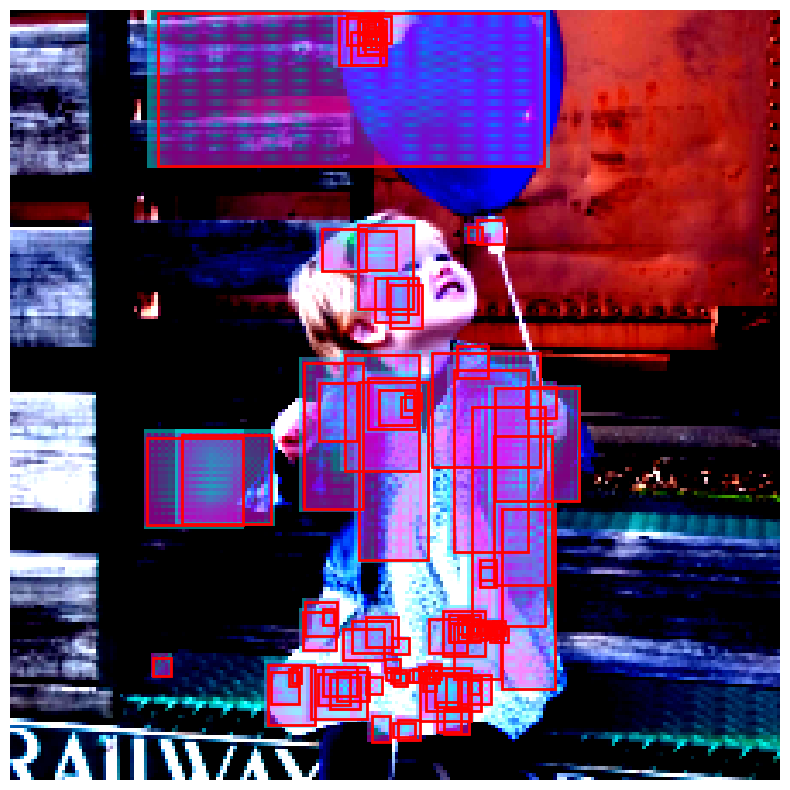

In [48]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as F
import numpy as np

# Convert image tensor to a format suitable for visualization
def visualize_image_with_masks(image_tensor, masks, boxes):
    # Move the tensor to CPU and detach from the computation graph
    image = image_tensor.cpu().detach()

    # Convert from (C, H, W) to (H, W, C) for visualization
    if image.shape[0] == 3:
        image = image.permute(1, 2, 0)

    image = image.numpy()

    # Show the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')

    # Loop through each predicted mask
    for i in range(masks.shape[0]):
        mask = masks[i, 0].cpu().detach().numpy()  # Extract the mask for the i-th object
        mask = np.ma.masked_where(mask == 0, mask)  # Mask the areas where there's no object

        # Overlay the mask
        plt.imshow(mask, cmap='cool', alpha=0.5)  # Adjust alpha for transparency

        # Get bounding box and plot it
        box = boxes[i].cpu().detach().numpy()
        x_min, y_min, x_max, y_max = box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='red', linewidth=2)
        plt.gca().add_patch(rect)

    plt.show()

# Visualizing one image and its predictions from the test loader
with torch.no_grad():
    for images, _ in test_data_loader:
        images = [image.to(device) for image in images]  # Move to device
        predictions = model(images)  # Get the predictions

        # Visualize the first image and its masks
        image = images[0]  # The image to visualize
        predicted_masks = predictions[0]['masks']  # Masks for the first image
        predicted_boxes = predictions[0]['boxes']  # Bounding boxes for the first image

        visualize_image_with_masks(image, predicted_masks, predicted_boxes)
        break  # Only visualize the first batch


## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->